In [10]:
from sklearn import datasets
import sklearn
import pandas as pd
#from sklearn.model_selection import train_val_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Read in the Data

Read the ants data into a dataframe.

**Change**: Change 'filename' to the name of the file.

In [11]:
# load ants dataset
dataframe = pd.read_csv('all_measurments2020x09.csv')

# replace species names with zeros and ones
dataframe['species'] = dataframe['species'].replace('zeteki', 0)
dataframe['species'] = dataframe['species'].replace('fovouros', 1)

# view data
dataframe.head()

/tmp/ipykernel_87/3674856249.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe['species'] = dataframe['species'].replace('fovouros', 1)


,bc_num,coll_code,HW,HL,SL,EL,FL,ML,PL,PPL,...,CI,EI,SI,FLI,WL,TL,caste,species,country,comment
0,Weber4_TYPE,WEBER_TYPE,1.436,1.155,1.183,0.264,0.901,2.056,0.479,0.310,...,124.3290,22.8571,82.3816,62.7437,0.789,5.267,worker,0,Panama,[Type] [Barro Colo. I C.Z. 3441 NAWeber] [Trac...
1,WEBER1_PARA,WEBER_1,1.550,1.216,1.231,0.274,0.912,2.127,0.456,0.319,...,127.4671,22.5329,79.4194,58.8387,0.775,5.486,worker,0,Panama,[Barro Colo. I. Canal Zone No856 NAWeber 1938 ...
2,WEBER2_PARA,WEBER_2,1.550,1.216,1.276,0.274,0.912,2.188,0.425,0.304,...,127.4671,22.5329,82.3226,58.8387,0.729,5.379,worker,0,Panama,TOP of 2 specimen on pin[Barro Colo. I. Canal ...
3,WEBER2.1_PARA,WEBER_2.1,1.520,1.246,1.246,0.274,0.912,2.127,0.456,0.304,...,121.9904,21.9904,81.9737,60.0000,0.760,5.440,worker,0,Panama,BOTTOM of 2 specimen on pin[Barro Colo. I. Can...
4,Weber3_PARA,WEBER_3,1.459,1.185,1.155,0.213,0.881,1.915,0.486,0.304,...,123.1224,17.9747,79.1638,60.3838,0.790,5.136,worker,0,Panama,[Barro Colorado. CANAL ZONE No. 756 N.A.Weber ...


# Plot the data, and choose variables

Now, we will plot the data. You need to choose two features that you want to use to predict species identity. To learn more about what the features are, see the caption of Figure 1 in the paper: https://peerj.com/articles/11622/#fig-1.

**Change**: Change the strings 'variable1' and 'variable2' to the variables you want to plot. We are just using variable names in this case, not direct pointers to the data.

<Axes: xlabel='PL', ylabel='HL'>

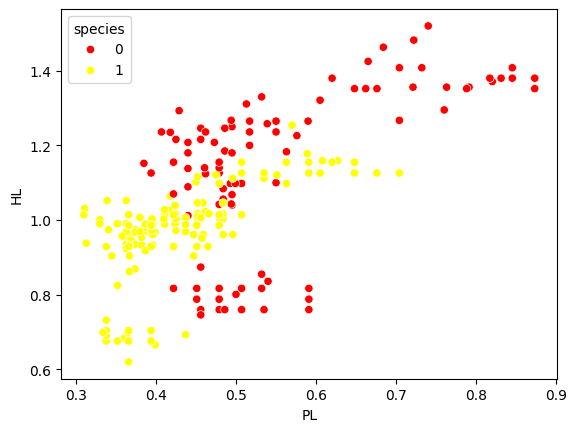

In [12]:
# Choose your features, and set species as the target label.
label1 = 'HL'
label2 = 'PL'
labeltarget = 'species'

# plot the results
custom_palette = {0: 'red', 1: 'yellow'}
sns.scatterplot(y=label1, x=label2, hue=labeltarget, data=dataframe, palette=custom_palette)

# Prepare the data

The code below prepares your data for the rest of the script. Try to understand what each step of the code is doing.

**Answer Question 1**

In [13]:
# Subset the dataframe to only include our features and target.
dataframe_subset = dataframe[[label1,label2,labeltarget]]

# Separate features (X) and target variable (y)
X = dataframe_subset.drop(labeltarget, axis=1)
y = dataframe_subset[labeltarget]
X.head()

# Split the dataset into testing, testing, and validation sets 
# NOTE: DO NOT CHANGE THESE RANDOM_STATE VARIABLES
X_train, X_temp, y_train, y_temp = sklearn.model_selection.train_test_split(X, y, test_size=0.75, random_state=123)
X_val, X_test, y_val, y_test = sklearn.model_selection.train_test_split(X_temp, y_temp, test_size=0.50, random_state=123)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression: Training

Train the logistic regression model.

In [14]:
# Initialize and fit the logistic regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000, penalty=None)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, penalty=None)

# Define a function to plot decision boundaries.

Below, I have defined a function to plot our decision boundaries. You do not need to modify this code. We will use this function later in the notebook.

In [15]:
def plot_decision_boundaries(X, Y, predicted_Y, model, label1, label2):
    """A function to plot decision boundaries."""

    # Get decision boundaries by creating a grid of potential x1 and x2 points
    h = 0.02  # Step size in the mesh
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x1x1, x2x2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

    # Get predictions for each point in the mesh
    Z = model.predict(np.c_[x1x1.ravel(), x2x2.ravel()])
    Z = Z.reshape(x1x1.shape)


    # Plot the scatter plot
    custom_palette = {0: 'red', 1: 'blue'}
    scatter = sns.scatterplot(x=X[:,0], y=X[:,1], hue=Y, palette=custom_palette)

    # Match contour colors with scatter plot colors
    contour = plt.contourf(x1x1, x2x2, Z, cmap=plt.cm.RdYlBu, alpha=0.2)

    # Add legend for the scatter plot
    scatter.legend()

    plt.title('Decision Boundaries')
    plt.xlabel(label1)
    plt.ylabel(label2)
    plt.show()

# Evaluate the Logistic Regression on the training data.

Below, we use several approaches to evaluate our classifier on the training data.
* accuracy: The proportion of correctly classified examples.
* confusion matrix: Confusion matrix whose i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label being j-th class.
* plot: Shows the true (color of point) and predicted (color of background) values for each item in the training dataset.

Accuracy: 0.78
Confusion Matrix:
[[14 11]
 [ 4 38]]


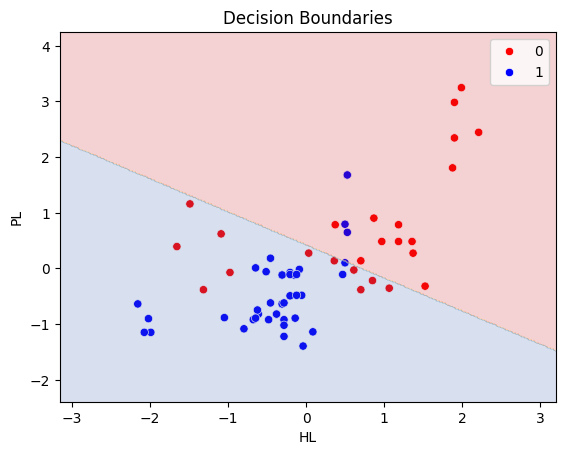

In [16]:
# Predictions on the training set
y_pred_train = logreg.predict(X_train_scaled)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Print the results
print(f'Accuracy: {accuracy_train:.2f}')
print('Confusion Matrix:')
print(conf_matrix_train)

# Plot the decision boundaries
plot_decision_boundaries(X=X_train_scaled, Y=y_train, predicted_Y=y_pred_train, model=logreg, label1=label1, label2=label2)

# Evaluate the Logistic Regression on the validation data.

Below, we use several approaches to evaluate our classifier on the validation data.
* accuracy: The proportion of correctly classified examples.
* confusion matrix: Confusion matrix whose i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label being j-th class.
* plot: Shows the true (color of point) and predicted (color of background) values for each item in the validation dataset.

Accuracy: 0.71
Confusion Matrix:
[[27 17]
 [12 45]]


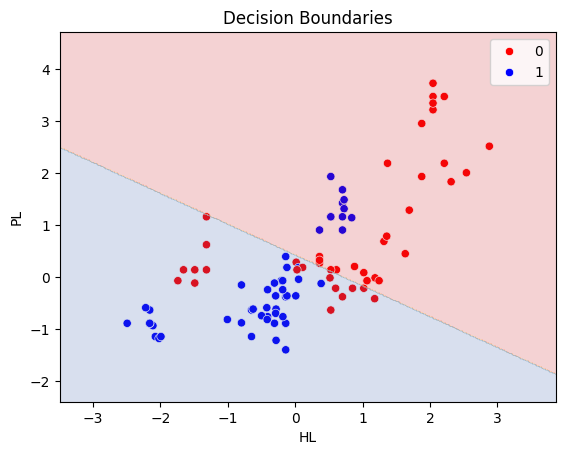

In [17]:
# Predictions on the validation set
y_pred_val = logreg.predict(X_val_scaled)

# Evaluate the model
accuracy_val = accuracy_score(y_val, y_pred_val)
conf_matrix_val = confusion_matrix(y_val, y_pred_val)

# Print the results
print(f'Accuracy: {accuracy_val:.2f}')
print('Confusion Matrix:')
print(conf_matrix_val)

# Plot the decision boundaries
plot_decision_boundaries(X=X_val_scaled, Y=y_val, predicted_Y=y_pred_val, model=logreg, label1=label1, label2=label2)

# Fit Support Vector Machine and evaluate it on the training data

Now, we will fit a support vector machine and evaluate it on the training data. 

**Change**: Change the following things to fit different models (try a few!)
* the kernel: polynomial (***poly***) and radial basis function (***rbf***) are available.
* degree: When using the polynomical kernel, define the degree of the polynomial as some positive integer >= 1.
* C: Regularization parameter. When C is low, the classifier will look for large margins, and will allow for a lot of misclassification. When C is high, the classifier will find a smaller margin, and will penalize misclassification more.

Accuracy: 0.90
Confusion Matrix:
[[22  3]
 [ 4 38]]


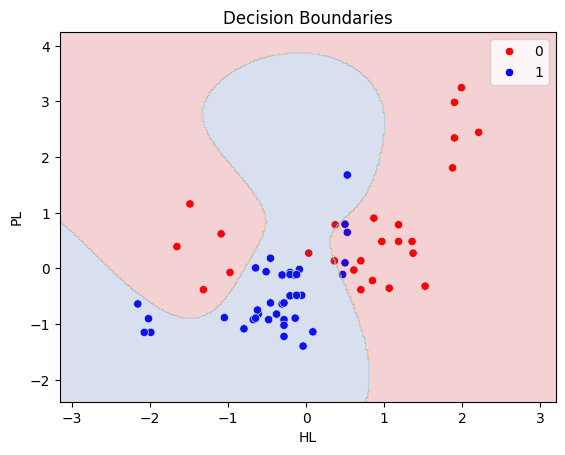

In [18]:
# Initialize and fit the SVM model
svm_model = SVC(kernel='rbf', C=100)  # You can adjust the kernel and C parameter as needed, but to use polynomial, you need to add a degree paramter
svm_model.fit(X_train_scaled, y_train)

# Predictions on the training set
y_pred_train_svm = svm_model.predict(X_train_scaled)

# Evaluate the model
accuracy_train_svm = accuracy_score(y_train, y_pred_train_svm)
conf_matrix_train_svm = confusion_matrix(y_train, y_pred_train_svm)

# Print the results
print(f'Accuracy: {accuracy_train_svm:.2f}')
print('Confusion Matrix:')
print(conf_matrix_train_svm)

# Plot the decision boundaries
plot_decision_boundaries(X=X_train_scaled, Y=y_train, predicted_Y=y_pred_train_svm, model=svm_model, label1=label1, label2=label2)

# Fit Support Vector Machine and evaluate it on the validation data

There are issues with choosing our model based on performance on three training data. Here, we repeat what we did above, except we evaluate our model on the validation data instead of the training data.

**Change**: Change the following things to fit different models (try a few!)
* the kernel: polynomial (***poly***) and radial basis function (***rbf***) are available.
* degree: When using the polynomical kernel, define the degree of the polynomial as some positive integer >= 1.
* C: Regularization parameter. When C is low, the classifier will look for large margins, and will allow for a lot of misclassification. When C is high, the classifier will find a smaller margin, and will penalize misclassification more.

**NOTE**: When you finish experimenting in this and the previous block, choose the model you think is the most appropriate, and make sure it is the last model you fit, as we will use it below.

Accuracy: 0.93
Confusion Matrix:
[[40  4]
 [ 3 54]]


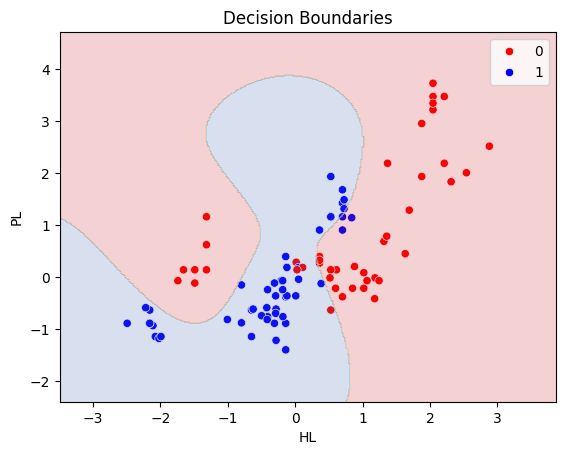

In [19]:
# Initialize and fit the SVM model
svm_model_v2 = SVC(kernel='rbf', C=100)  # # You can adjust the kernel and C parameter as needed, but to use polynomial, you need to add a degree paramter
svm_model_v2.fit(X_train_scaled, y_train)

# Predictions on the training set
y_pred_val_svm = svm_model_v2.predict(X_val_scaled)

# Evaluate the model
accuracy_val_svm = accuracy_score(y_val, y_pred_val_svm)
conf_matrix_val_svm = confusion_matrix(y_val, y_pred_val_svm)

# Print the results
print(f'Accuracy: {accuracy_val_svm:.2f}')
print('Confusion Matrix:')
print(conf_matrix_val_svm)

# Plot the decision boundaries
plot_decision_boundaries(X=X_val_scaled, Y=y_val, predicted_Y=y_pred_val_svm, model=svm_model_v2, label1=label1, label2=label2)

# Simple Hold Out Cross-Validation (Required for 6990 only)

In the box below, write a for loop that uses cross validation to select the best value for some parameter.

Hints:
* Select a parameter to compare (e.g., the degree of the polynomial or C)
* Define a list with the values you want to consider.
* Write a for loop to iterate over the list, train a model with the current value of the parameter, and record the error on the held out validation dataset.
* Find which value of the parameter had the lowest error, and print this value.

In [20]:
# code goes here.

# Evaluate your selected model on the test dataset

***IMPORTANT: Only run this model once, when you have finalized your decision regarding which model to use! Looking at the results on your test data and then updating your model is <ins> not cool </ins>***.

In [ ]:
# Specify the model (defined above) that you want to use moving forward
my_best_model = svm_model_v2

# Predictions on the testing set
y_pred_final_test = my_best_model.predict(X_test_scaled)

# Evaluate the model
accuracy_final_test = accuracy_score(y_test, y_pred_final_test)
conf_matrix_final_test = confusion_matrix(y_test, y_pred_final_test)

# Print the results
print(f'Accuracy: {accuracy_final_test:.2f}')
print('Confusion Matrix:')
print(conf_matrix_final_test)

# Plot the decision boundaries
plot_decision_boundaries(X=X_test_scaled, Y=y_test, predicted_Y=y_pred_final_test, model=my_best_model, label1=label1, label2=label2)